# Analysis 1
- Analyze the historical baseball data and find which teams had the highest batting average and which years were their highest batting average and try to dig a little deeper into why their average was high

In [1]:
# allow the plot to display in the ironpython window
%matplotlib inline

In [3]:
# import modules to process data and plot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read in the batting csv file
baseball = pd.read_csv('./Data/baseball/core/Batting.csv')

In [5]:
# group by team
grouped_baseball = baseball.groupby('teamID')

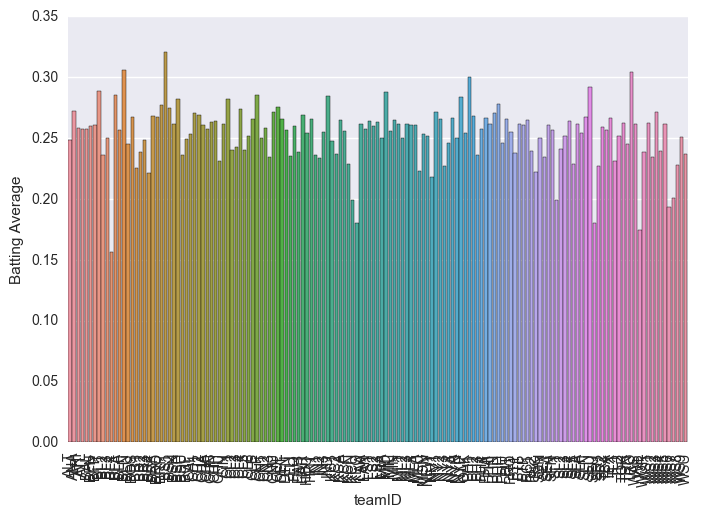

In [14]:
# create a barplot of the data
ax = sns.barplot(grouped_baseball['teamID'].count().index,grouped_baseball['H'].mean()/grouped_baseball['AB'].mean())
names = baseball['teamID'].sort_values()

ax.set_xticklabels(grouped_baseball['teamID'].count().index,rotation=90)
ax.set_ylabel('Batting Average')
fig = ax.get_figure()
fig.savefig('ana1/AllTeamsBattingAverage.png',  bbox_inches='tight',dpi=600)

# Initial Analysis 1
- The plot above shows only 4 teams had above a .300 average for the team's history.  A look into those four teams will uncover how they were successful

In [101]:
# store the average in a new dataframe
average = pd.DataFrame()
average['average'] = (grouped_baseball['H'].mean()/grouped_baseball['AB'].mean())

In [102]:
# find the averages over .300
average_greater = average[average['average'] > 0.30]

In [103]:
# get the names of the teams whose average is over .300
teams = average_greater.index.values


In [105]:
# pull out the teams from the original data set
baseball_teams = baseball[(baseball['teamID'].isin(teams))]
baseball_teams.to_csv('ana1/TeamAverages.csv')

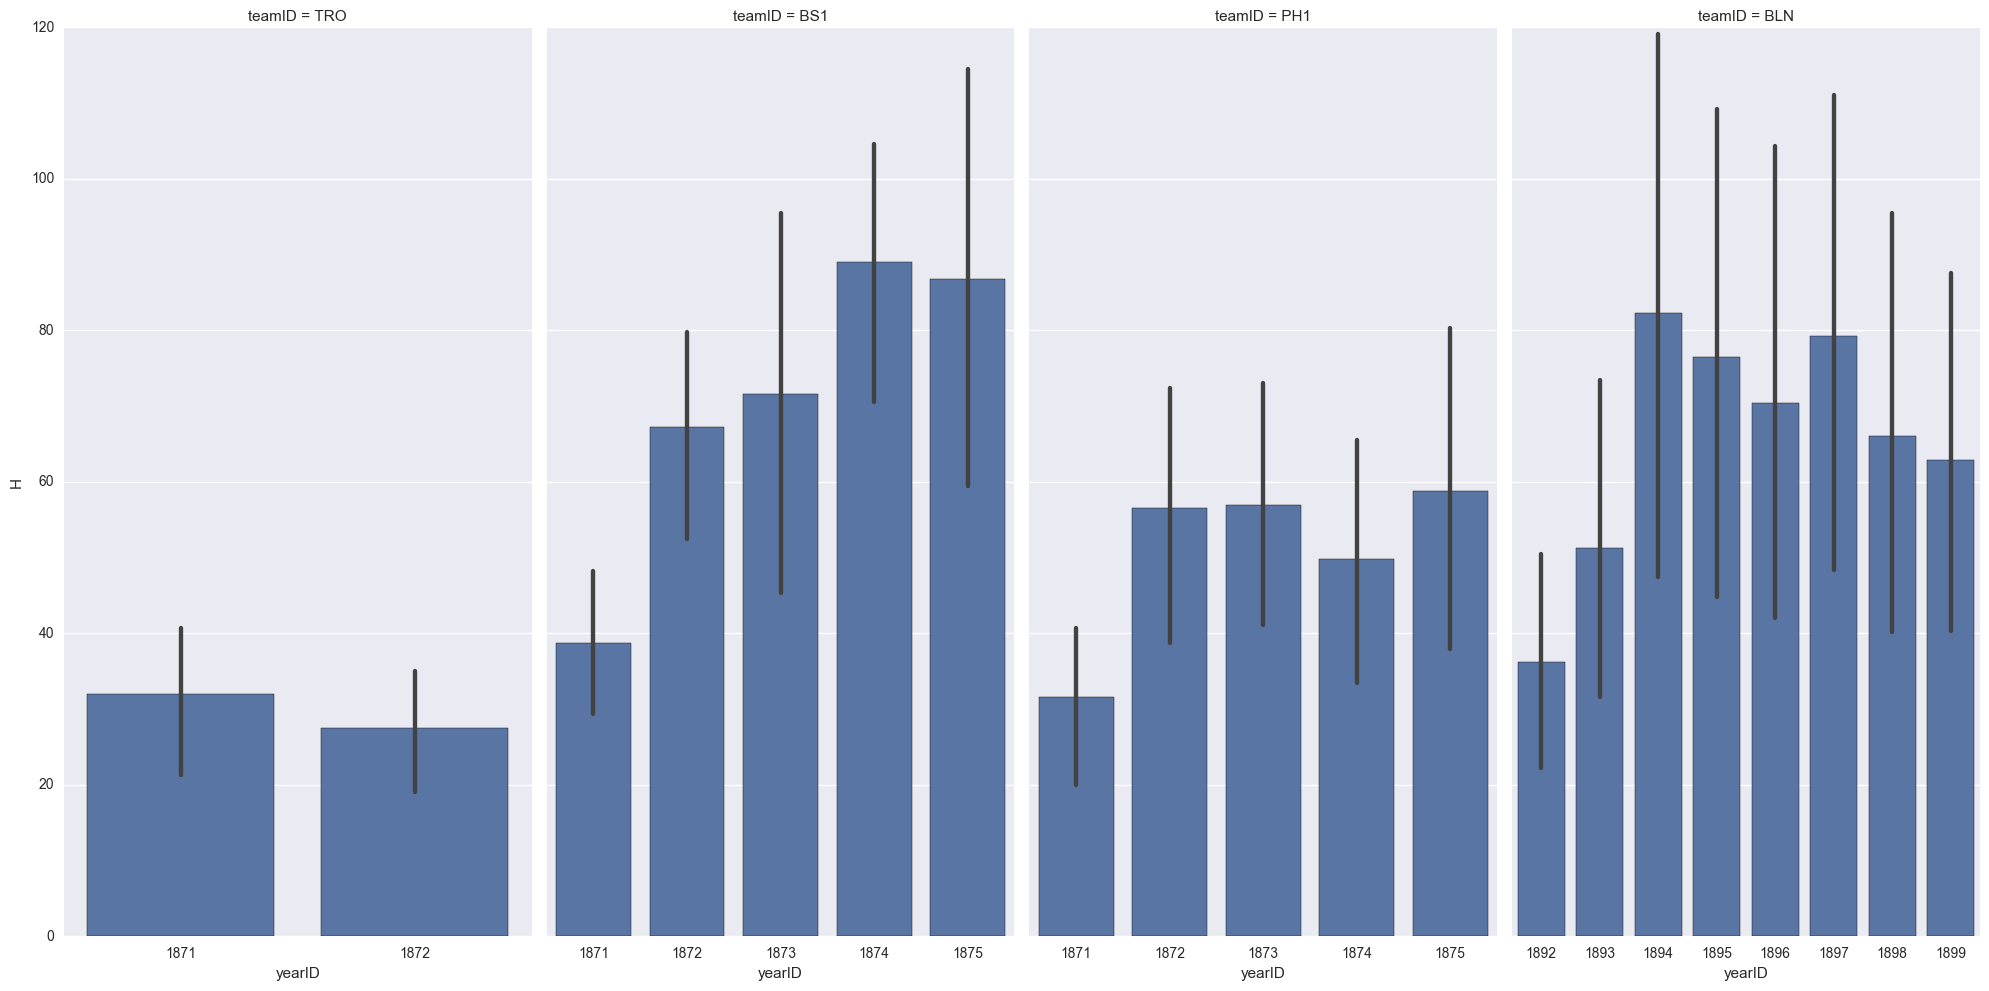

In [111]:
# prepare plot
g = sns.FacetGrid(baseball_teams, col="teamID", size=10, aspect=.5, sharex=False)
ax = g.map(sns.barplot, 'yearID', 'H');
ax.savefig('ana1/Analysis1TeamHits.png')

# Final Analysis 1
- The above analysis shows that the teams with above 300 averages both played before the turn of the 20th century, and didn't play more than 8 years.  In 1871, there were only between 28-30 games played, and in 1875 there was only 80 games played, so production for a much smaller scale is much easier than a full 162 game slate that the players nowadays play.

# Analysis 2
- The next analysis is to analyze the best hitters in the baseball throughout all time.  This will be calculated via batting average, and will remove those players who had less than 10 at bats, as their record will be skewed.  

In [47]:
# read in the batting csv file
baseball = pd.read_csv('./Data/baseball/core/Batting.csv')
baseball[baseball['playerID'].str.contains('hornsro')]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
15554,hornsro01,1915,1,SLN,NL,18,57,5,14,2,...,4.0,0.0,2.0,2,6.0,NaN,0.0,2.0,NaN,NaN
16251,hornsro01,1916,1,SLN,NL,139,495,63,155,17,...,65.0,17.0,NaN,40,63.0,NaN,4.0,11.0,NaN,NaN
16776,hornsro01,1917,1,SLN,NL,145,523,86,171,24,...,66.0,17.0,NaN,45,34.0,NaN,4.0,17.0,NaN,NaN
17306,hornsro01,1918,1,SLN,NL,115,416,51,117,19,...,60.0,8.0,NaN,40,43.0,NaN,3.0,7.0,NaN,NaN
17797,hornsro01,1919,1,SLN,NL,138,512,68,163,15,...,71.0,17.0,NaN,48,41.0,NaN,7.0,10.0,NaN,NaN
18337,hornsro01,1920,1,SLN,NL,149,589,96,218,44,...,94.0,12.0,15.0,60,50.0,NaN,3.0,8.0,NaN,NaN
18842,hornsro01,1921,1,SLN,NL,154,592,131,235,44,...,126.0,13.0,13.0,60,48.0,NaN,7.0,15.0,NaN,NaN
19381,hornsro01,1922,1,SLN,NL,154,623,141,250,46,...,152.0,17.0,12.0,65,50.0,NaN,1.0,15.0,NaN,NaN
19918,hornsro01,1923,1,SLN,NL,107,424,89,163,32,...,83.0,3.0,7.0,55,29.0,NaN,3.0,5.0,NaN,NaN
20452,hornsro01,1924,1,SLN,NL,143,536,121,227,43,...,94.0,5.0,12.0,89,32.0,NaN,2.0,13.0,NaN,NaN


In [48]:
baseball['playerID'] = baseball['playerID'].apply(lambda x: x.rstrip('012'))
players = baseball.groupby('playerID')

In [49]:
average_players = players.mean()

In [51]:
good_hitters = average_players[(average_players['H']/average_players['AB'] > .350)]
# sns.barplot(players['teamID'].count().index,players['H'].mean()/players['AB'].mean())

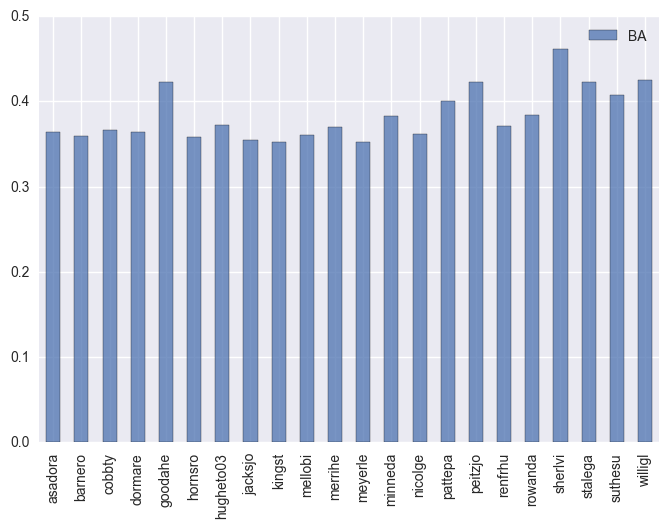

In [52]:
non_pitchers_good_hitters = good_hitters[good_hitters['H'] > 10]

#sns.barplot(non_pitchers_good_hitters.index,, palette="Blues")
df = pd.DataFrame({ 'hitters':non_pitchers_good_hitters.index, 'BA':non_pitchers_good_hitters['H']/non_pitchers_good_hitters['AB']})
df = df[["hitters","BA"]]
df.set_index(["hitters"],inplace=True)
ax = df.plot(kind='bar',alpha=0.75, rot=90)
plt.xlabel("")
plt.show()
fig = ax.get_figure()
fig.savefig('ana2/Highest_Batting_Average.png',  bbox_inches='tight',dpi=600)

In [53]:
names = non_pitchers_good_hitters.index.values
stats = baseball[baseball['playerID'].isin(names)]

my_frame = stats[['yearID', 'playerID', 'H']].reset_index(drop=True)

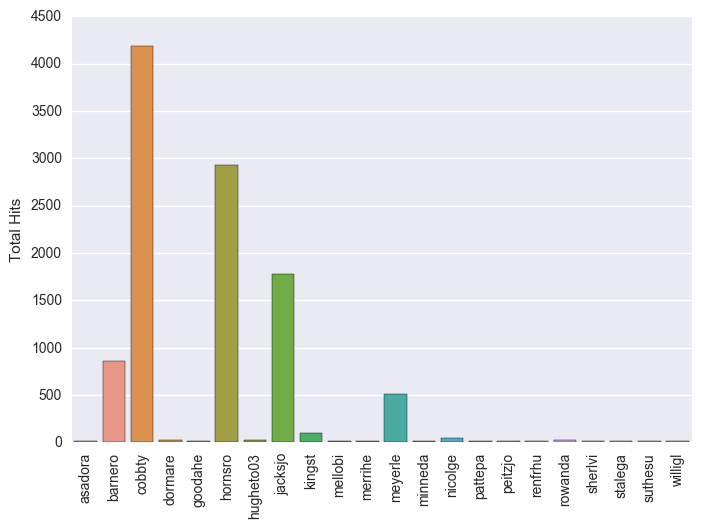

In [54]:
#stats.plot.scatter(stats['playerID'],stats['H'])
#pivoted = pd.pivot_table(my_frame, values='H', columns='playerID', index='yearID')
#pivoted.plot()
my_frame.groupby('playerID')['H'].sum()

ax = sns.barplot(names,my_frame.groupby('playerID')['H'].sum())
ax.set_xticklabels(names,rotation=90)
ax.set_ylabel('Total Hits')
fig = ax.get_figure()
fig.savefig('ana2/Analysis2PlayerHits.png',  bbox_inches='tight',dpi=600)

# Final analysis 2
- Hitting above .300 for the entire career is a very difficult thing to do.  Only 3 players who had at least 1500 hits throughout all of baseball was able to have a career average above .300.  That means that since 1871, only 3 players have managed to achieve this accomplishment.  Ty Cobb had one of the most successful careers, batting from 1905-1928.  Ro Horns also managed above a 350 with just about 3000 hits in between 1915 and 1937.  

# Analysis 3
- The goal of this analysis is to search through and find the strikeout percentage based on the players last initial.  I will group all players based on the last initial of their name, and then discover the total at bats and the total strikeout counts.  Then I will find the percentage of at bats that were strikeouts.

In [44]:
# read in the batting csv file
baseball = pd.read_csv('./Data/baseball/core/Batting.csv')

In [45]:

last_name = baseball.groupby([baseball['playerID'].str[0]])
new_frame = pd.DataFrame({'count' : last_name.size()})

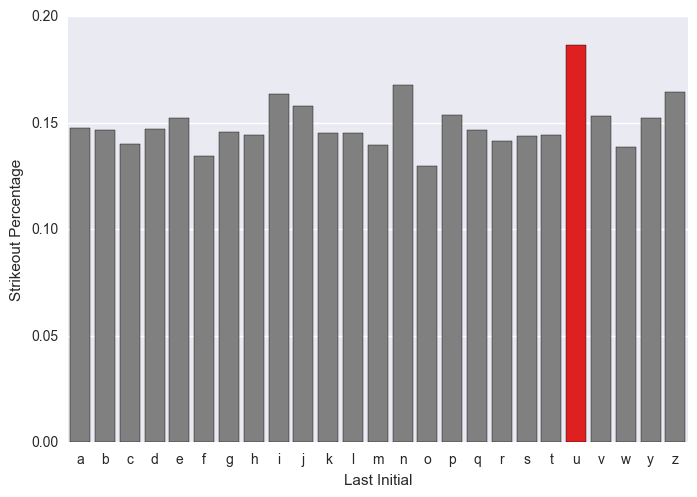

In [46]:
df = last_name.mean()
df['SO_P'] = df['SO']/df['AB']
df
#names = df.index.get_values
clrs = ['grey' if (x < max(df['SO_P'])) else 'red' for x in df['SO_P'] ]
ax = sns.barplot(df.index,df["SO_P"], palette=clrs)
ax.set(xlabel='Last Initial', ylabel='Strikeout Percentage')
fig = ax.get_figure()
fig.savefig('ana3/Higheststrikeout.png', bbox_inches='tight',dpi=600)


# Analysis 4
- The goal of this analysis is to read in the pitching database, and discover which team has had the top pitchers as far as lowest ERA is concerned.

In [3]:
pitchers = pd.read_csv('./Data/baseball/core/Pitching.csv')

In [4]:
df = pitchers.groupby(pitchers['playerID'][0:-2])

In [38]:
df2 = df.mean()
my_data_frame = df2[((df2['ERA'] < 1.50) & (df2['SV'] > 0))]
#average['average'] = (grouped_baseball['H'].mean()/grouped_baseball['AB'].mean())

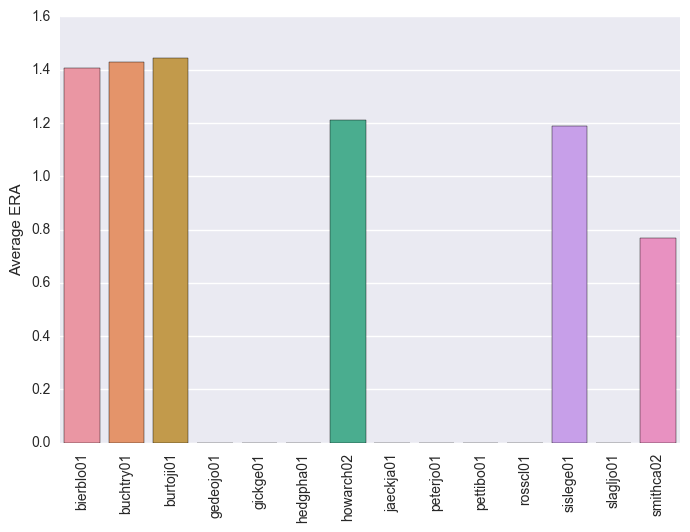

In [55]:
ax = sns.barplot(my_data_frame.index.values,my_data_frame.ERA)
ax.set_xticklabels(my_data_frame.index.values,rotation=90)
ax.set_ylabel('Average ERA')
fig = ax.get_figure()
fig.savefig('ana4/Analysis4RelieverERAs.png')
my_data_frame.to_csv('ana4/ReliefPitchers.csv')

# Analysis 5

In [24]:
pitchers = pd.read_csv('./Data/baseball/core/Pitching.csv')

In [27]:
pitchers['playerID'] = pitchers['playerID'].apply(lambda x: x.rstrip('012'))
grouped_pitchers = pitchers.groupby(pitchers['playerID'])

In [29]:
summed_pitchers = grouped_pitchers.sum()

In [32]:
big_winners = summed_pitchers[summed_pitchers['W'] > 300]

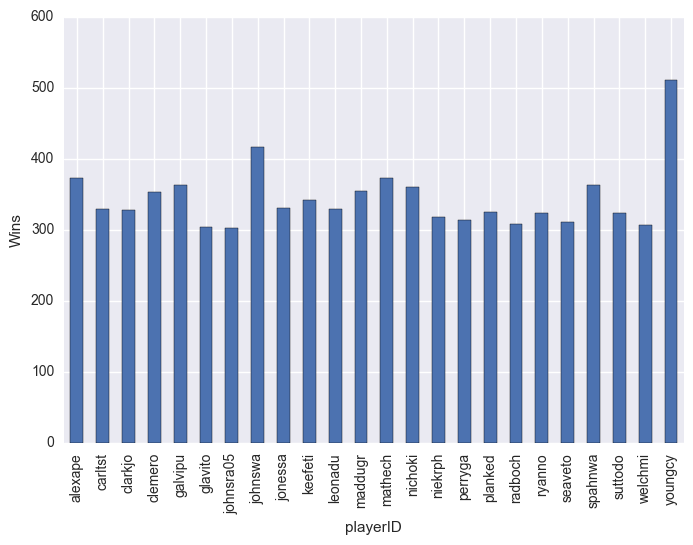

In [39]:
ax = big_winners['W'].plot(kind='bar')
ax.set_ylabel('Wins')
fig = ax.get_figure()
fig.savefig('ana5/PitcherWins.png', bbox_inches='tight',dpi=600)